In [17]:
import nltk

In [18]:
from collections import Counter

In [19]:
words = ['hello', 'hell', 'owl', 'hello', 'world', 'war', 'hello', 'war']

In [20]:
counter_obj = Counter(words)
counter_obj.most_common() #counter_obj.most_common(n=10)

[('hello', 3), ('war', 2), ('hell', 1), ('owl', 1), ('world', 1)]

In [21]:
from nltk.corpus import stopwords

In [28]:
Genesis = """In the beginning God created the heaven and the earth."""

In [29]:
# Word Tokenizing is to separate each word from the content
from nltk.tokenize import word_tokenize as wt

In [30]:
# we have created an instance called ‘wt’ for ‘word_tokenize’. Let’s apply this tokenizing
Genesis = wt(Genesis)

In [14]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [31]:
#  ‘join’ method to view it as a string
' '.join(Genesis)

'In the beginning God created the heaven and the earth .'

As you can see, due to the word tokenizing, words, numbers, and even punctuation marks are separated as individual elements in the list. As we have returned it with the ‘join’ method with a space, it is showing a string of these elements separated by spaces.

Numbers and punctuation marks are unwanted because we are going to check the frequency distribution of words and letters only. So, we need to get rid of them

In [32]:
# Getting rid of Punctuation Marks
# We need to import the ‘string’ library in Python and use the ‘punctuation’ class.\

import string
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
Genesis_no_punct = []
for i in Genesis:
    for j in list(string.punctuation):
        i = i.replace(j,'').lower()
    Genesis_no_punct.append(i)

In [35]:
# Let’s see Genesis_no_punct’ will look like. For that, let’s use the ‘join’ method to view it as a string
' '.join(Genesis_no_punct)

'in the beginning god created the heaven and the earth '

In [36]:
# Getting rid of Numbers
# So far we have eliminated punctuation marks. Now, let’s define a new list called ‘Genesis_words’. 
# This list should be free of numbers. To do so, we are going to use a for loop with some string methods.
Genesis_words = []
for i in Genesis_no_punct:
    if i.isalpha():
        Genesis_words.append(i)

In [38]:
# Let’s see how ‘first_gen_words’ will look like. For that, let’s use the ‘join’ method to view it as a string.
' '.join(Genesis_words)

'in the beginning god created the heaven and the earth'

Now, this consists of words only. No punctuations. No numbers.

In [39]:
# Checking the Frequency Distribution
# To check the Frequency Distribution, we are going to use the ‘FreqDist’ class which is included in the ‘nltk’ library. 
from nltk.probability import FreqDist as fd

In [40]:
# Most frequently used 10 words
# We can simply check the most frequently used 10 words as follows.
fd(Genesis_words).most_common(10)

[('the', 3),
 ('in', 1),
 ('beginning', 1),
 ('god', 1),
 ('created', 1),
 ('heaven', 1),
 ('and', 1),
 ('earth', 1)]

We have made use of the ‘fd’ object and called the ‘most_common’ method passing the parameter as 10. It returns a list of tuples. Each tuple consists of two elements; the word and the occurrence

In [41]:
# We can visualize these data as well. To do that we need to add these elements to a dictionary. 
# Then, by using the Pandas library we can visualize it in a graph. 
# So, let’s add the words and the occurrences to a dictionary named ‘word_dict’.
word_dict = dict(fd(Genesis_words).most_common(10))
word_dict

{'the': 3,
 'in': 1,
 'beginning': 1,
 'god': 1,
 'created': 1,
 'heaven': 1,
 'and': 1,
 'earth': 1}

<AxesSubplot:>

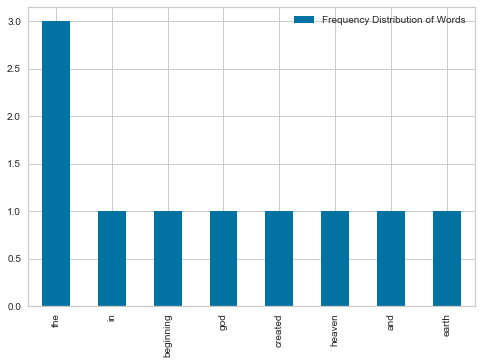

In [42]:
# let’s make use of the Pandas library.
import pandas as pd
most_common_words = pd.DataFrame({"Frequency Distribution of Words": list(word_dict.values())}, index=list(word_dict.keys()))
most_common_words.plot(kind="bar")

In [43]:
# Most frequently used 10 letters
# First, let’s take all the letters from all the words.

letters = []
for i in str(Genesis_words):
    if i.isalpha():
        letters.append(i)

In [44]:
# Now, we can do the same thing to the ‘letters’ list. 
# We will use ‘fd’ and ‘most_common’ to check the most frequently used 10 letters.\
fd(letters).most_common(10)

[('e', 9),
 ('n', 6),
 ('t', 5),
 ('h', 5),
 ('a', 4),
 ('i', 3),
 ('g', 3),
 ('d', 3),
 ('r', 2),
 ('b', 1)]

In [45]:
# To visualize, we are going to make it a dictionary to be used in Pandas data frame. Let’s call this dictionary ‘letter_dict’.
letter_dict = dict(fd(letters).most_common(10))
letter_dict

{'e': 9,
 'n': 6,
 't': 5,
 'h': 5,
 'a': 4,
 'i': 3,
 'g': 3,
 'd': 3,
 'r': 2,
 'b': 1}

<AxesSubplot:>

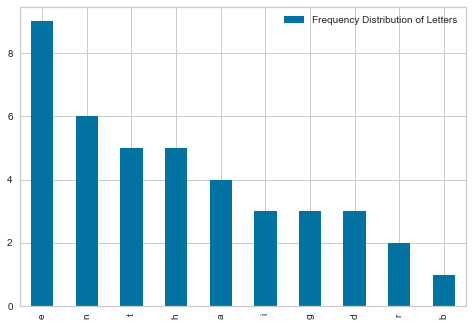

In [46]:
# let’s visualize this, as we did before for words
import pandas as pd
most_common_letters = pd.DataFrame({"Frequency Distribution of Letters":  list(letter_dict.values())}, index=list(letter_dict.keys()))
most_common_letters.plot(kind="bar")